# Linear Regression 

## Advantages:
1. Very simple to implement
2. Performs well on data with linear relationship
______________________________________________________________________________________________________
## Disadvantages:
1. Not suitable for data having non-linear relationship
2. Underfitting issue
3. Sensitive to Outliers

In both scatter plot analysis and linear regression modeling, we use a loss function to evaluate the accuracy of the model. The loss function measures the difference between the observed values and the values predicted by the model. A lower value of the loss function indicates a better fit of the model to the data, which corresponds to higher accuracy in the predictions made by the model.


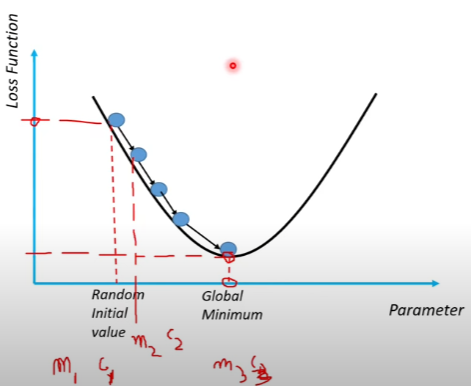
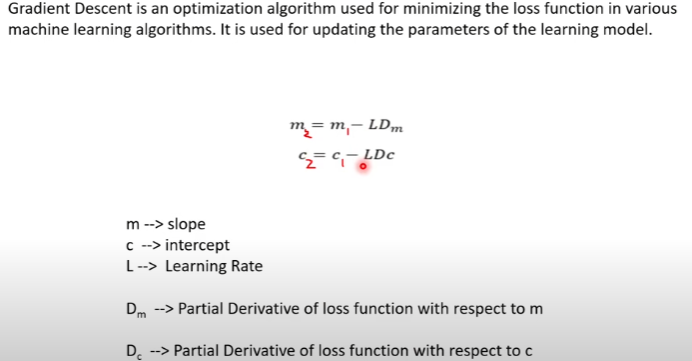

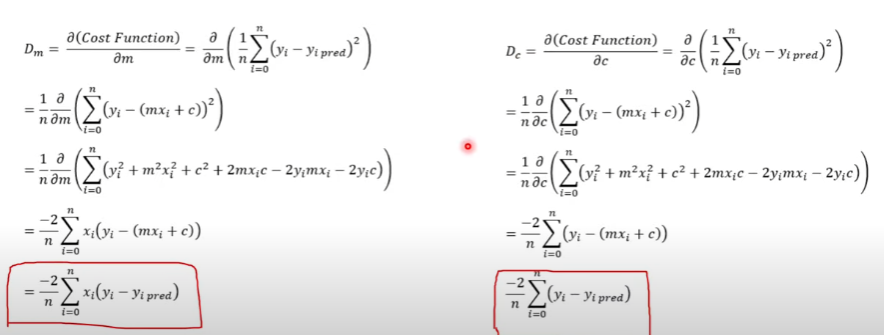

## CODE 
In ML for linear regression model
1. Y = wX + b
2. Y = Dependent Variable
3. X = Independent Variable 
4. w = weight
5. b =  bias

In [1]:
# importing the library 
import numpy as np 


#####  linear Regression model 
##### class is used in order to templates for the object 
1. The __init__ method (initialization function), which sets up the model's parameters and any other necessary initialization steps for our learning algorithm.
2. The fit method, which is used to train the linear regression model using the provided dataset. This involves finding the model parameters that best fit the data.
3. The update_weights method (optional, depending on implementation), which may be used to adjust the model's weights iteratively to minimize the loss function, thereby optimizing the model.
4. The predict function, which takes new data points as input and outputs predictions based on the learned model parameters.

### 'Self'
1. Represents the instance of the class.
2. Accesses attributes and methods of the class.
3. Binds instance to method arguments automatically.


learning rate and no. of iterations are called as hyperparameters of the model

Parameters allow the model to learn the rules from the data while hyperparameters control how the model is training. Parameters learn their own values from data. In contrast, hyperparameters do not learn their values from data,We need to manually specify them before training the model.

Work flow of the Linear Regression model:
1. Set Learning Rate & Number of Iterations; Initiate Random weight and bias value.
2. Build Linear Regression Equation. (y wx + b)
3. Find the "y pred" value for given x value for the corresponding weight & bias.
4. Check the loss function for these parameter values. (difference between "y pred" & "true y")
5. Update the parameter values using Gradient Descent. (new weight & bias value)
6. Step 3, 4, 5 are repeated till we get minimum loss function
Finally we will get the best model (best weight and bias value) as it has minimum loss function.

In [2]:
class Linear_Regression():
    # initiating the parameters {learing_rat & no_of_iterations}
    def __init__(self,learning_rate , no_of_iterations):
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def  fit(self,x,y):
        # no of training examples = m & no. of features = n
        self.m ,self.n = x.shape # it is no. of rows and columns 

        # initiating the weight and bias 
        self.w= np.zeros(self.n)
        self.b = 0

        
        self.x = x
        self.y = y
        # implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self,):
        Y_prediction = self.predict(self.x)
        
        # calculate the gradient
        
        dw = -(2*(self.x.T).dot(self.y-Y_prediction))/self.m
        db = - 2*np.sum(self.y-Y_prediction)/self.m
        
        # updating the weights
        
        self.w = self.w-self.learning_rate*dw
        self.b = self.b-self.learning_rate*db
        
    def predict(self,x):
        return x.dot(self.w)+ self.b
        

### Linear Regression for prediction 

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
#  Data preprocessing 
# load the data 
salary = pd.read_csv(r"C:\Users\utkar\100 days ML\salary_data.csv")

In [5]:
# first 5 columns of the dataframe
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# last 5 columns of the dataframe 
salary.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# n. of rows and cloumns are their in the dataframe 
salary.shape

(30, 2)

In [8]:
# checking for the missing values 
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
# spliting the feature and target columns
x = salary.iloc[:,:-1].values  # in this we are removing the salary column
y = salary.iloc[:,1].values   

In [10]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
# spliting the dataset in training and test data 
X_train, X_test , Y_train,Y_test = train_test_split(x,y,test_size= 0.33, random_state = 2)

In [30]:
# training the linear regression model
model = Linear_Regression(learning_rate = 0.02 , no_of_iterations = 1000)

In [31]:
model.fit(X_train , Y_train)

In [32]:
# printing the parameter values weights and bias 
print('weight = ', model.w[0])
print('bias = ' , model.b)

# our model is y = 9514(x)+23697 where y is salary


weight =  9514.400999035135
bias =  23697.406507136307


In [33]:
# predict the salary value for predict data 
test_data_prediction = model.predict(X_test)


In [34]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


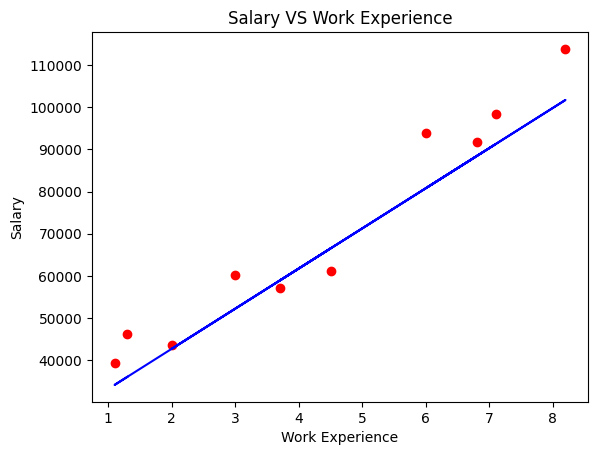

In [35]:
# visulize the predicted & actual value
plt.scatter(X_test,Y_test , color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary VS Work Experience')
plt.show()